In [ ]:
#### Random Forest ####

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/Ronil/Desktop/ISB/Term 2/Foundation Project/AAPL.csv')
df.head()

,ticker,date,open,high,low,close,adj close,volume
0,AAPL,07-01-2021,136.60,137.330,135.760,137.27,136.865,50374488
1,AAPL,6/30/2021,136.17,137.400,135.870,136.96,136.556,62906278
2,AAPL,6/29/2021,134.80,136.490,134.360,136.33,135.928,58641116
3,AAPL,6/28/2021,133.41,135.245,133.386,134.78,134.382,59959031
4,AAPL,6/25/2021,133.46,133.890,132.810,133.11,132.717,63990889


In [8]:
df_1 = df[["adj close", "volume"]]
df_1["Pct_change"] = df["adj close"].pct_change()
df_1.head()

C:\Users\Ronil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,adj close,volume,Pct_change
0,136.865,50374488,NaN
1,136.556,62906278,-0.002258
2,135.928,58641116,-0.004599
3,134.382,59959031,-0.011374
4,132.717,63990889,-0.012390


In [9]:
# Drop null values
df_1.dropna(inplace = True)
df_1.head()

C:\Users\Ronil\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,adj close,volume,Pct_change
1,136.556,62906278,-0.002258
2,135.928,58641116,-0.004599
3,134.382,59959031,-0.011374
4,132.717,63990889,-0.012390
5,133.016,64767059,0.002253


In [10]:
df_1.dtypes

adj close     float64
volume          int64
Pct_change    float64
dtype: object

In [11]:
X = df_1.drop('adj close',axis=1)
y = df_1['adj close']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [15]:
X_train.head()

,volume,Pct_change
123,92540792,0.034834
138,81462378,0.005172
115,104078002,-0.005400
98,70527203,0.001926
95,76304493,0.017960


In [16]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

In [17]:
rfc = RandomForestRegressor(n_estimators =200)

In [18]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred = rfc.predict(X_test)

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [20]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred

,Actual,Predicted
8,131.910,126.365260
25,126.476,126.662230
28,125.060,127.416710
120,131.241,129.360155
143,121.501,127.030825
52,134.214,128.216065
44,132.860,128.309320
23,124.242,132.309210
113,131.221,126.404175
27,126.725,129.338900


In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.645027500000008
Mean Squared Error: 29.7957512936036
Root Mean Squared Error: 5.458548460314665


In [22]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.65 degrees.
Accuracy: 96.36 %.


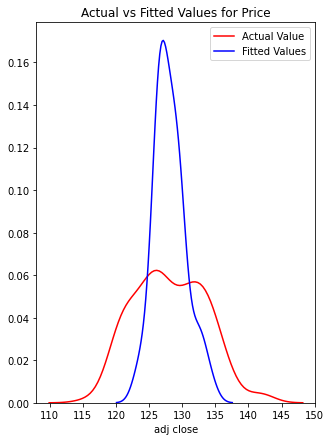

In [23]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [74]:
rfc.predict([[121.43,122.46,121.550,123.41,81464234]])

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([122.516905])

In [75]:
#### SVM ####

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('C:/Users/Ronil/Desktop/ISB/Term 2/Foundation Project/AAPL.csv')


In [24]:
df_2 = df[["adj close", "volume"]]
df_2["Pct_change"] = df["adj close"].pct_change()
df_2.head()

C:\Users\Ronil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,adj close,volume,Pct_change
0,136.865,50374488,NaN
1,136.556,62906278,-0.002258
2,135.928,58641116,-0.004599
3,134.382,59959031,-0.011374
4,132.717,63990889,-0.012390


In [33]:
# Drop null values
df_2.dropna(inplace = True)
df_2.head()

C:\Users\Ronil\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,adj close,volume,Pct_change
1,136.556,62906278,-0.002258
2,135.928,58641116,-0.004599
3,134.382,59959031,-0.011374
4,132.717,63990889,-0.012390
5,133.016,64767059,0.002253


In [34]:
X = df_2.drop('adj close',axis=1)
y = df_2['adj close']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.svm import SVR

In [37]:
svr = SVR(kernel = 'linear',C = 1000)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc= StandardScaler().fit(X_train)

C:\Users\Ronil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [40]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

C:\Users\Ronil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Ronil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[-0.53476454, -0.68048665],
       [-1.28536912,  0.76663892],
       [-2.00112899, -0.71510412],
       [ 0.40370967,  1.4166592 ],
       [-0.68294817, -0.65647394],
       [-0.29458978,  0.79318459],
       [ 2.12593171,  0.92961597],
       [-0.69339214,  0.19635318],
       [ 0.33340249, -1.99747029],
       [-1.00243337,  0.13435119],
       [ 1.54493338, -0.06911877],
       [ 0.72344301, -0.89387217],
       [ 2.71130794,  0.44838077],
       [-0.63518191, -1.2863788 ],
       [ 2.87276857, -1.54696376],
       [-0.1853489 ,  1.81563209],
       [-0.59936477, -0.1339784 ],
       [-0.21994606, -1.01687253],
       [-0.56571173,  0.30734973],
       [-2.05504592, -0.75967428],
       [ 2.32573685,  0.27809743],
       [-0.52232096,  1.57170439],
       [-0.13794517,  0.92958705],
       [ 0.28644241,  1.48999665],
       [-0.28200682,  0.10877908],
       [-1.28194319, -1.07997013],
       [-0.56910184,  0.36896095],
       [ 0.4099278 ,  0.10716029],
       [ 0.62812997,

In [41]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)

In [42]:
y_train_pred = svr.predict(X_train_std)

In [43]:
y_test_pred

array([128.33040611, 130.04790305, 129.35986865, 129.35797117,
       128.45679776, 129.3548902 , 127.7200015 , 129.15745454,
       126.63388987, 129.32995543, 127.32733073, 127.24951299,
       126.90668839, 127.91039992, 125.16854648, 130.10708252,
       128.82116574, 127.82995387, 129.15557761, 129.36253176,
       127.04638124, 130.15187041, 129.35277153, 129.50215281,
       128.78957319, 128.54462456, 129.20809641, 128.28920815,
       128.83331742, 125.64942901])

In [44]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Squared Error: 20.861600322329437
Root Mean Squared Error: 4.567450089746952


In [45]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.06669693974435853

In [46]:
r2_score(y_test,y_test_pred)

-0.09433294645718138

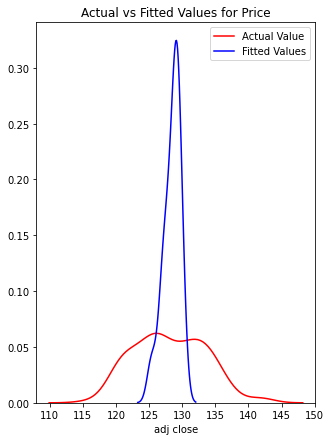

In [47]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()